#Grupo:

*   Marcelo Leopoldino dos Santos
*   Ramon Leôncio


## Análise 2


Fonte de dados:
Womens Clothing E-Commerce Reviews.csv

Este banco de dados contém review de produtos de e-commerce de vestuário feminino.

Colunas:
Review text: texto da review
RecommendedIND: variável binária onde 1 indica que a pessoa recomenda o produto e 0 caso contrário.

Realize os seguintes processos de análises:

1- Calcule a distribuição da variável de recomendação (RecommendedIND)

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

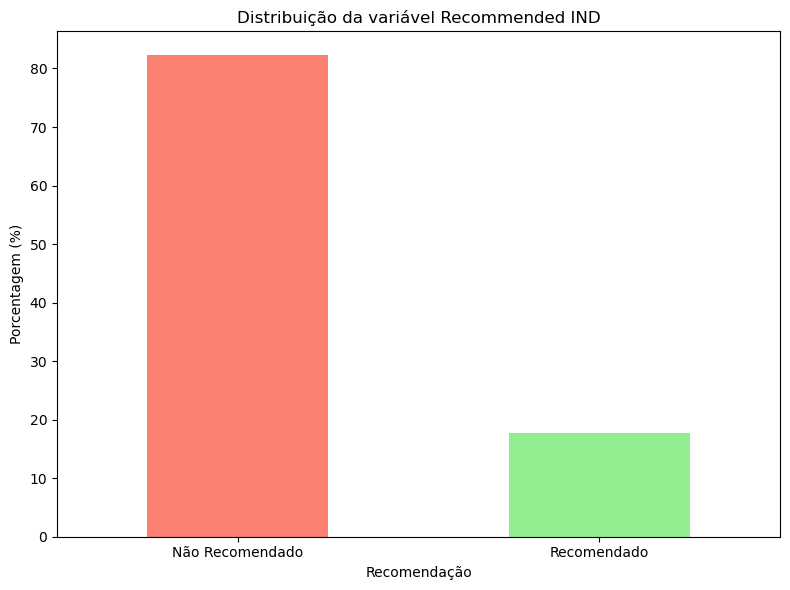

In [2]:
## Analise 2

#Exercicio 1

import pandas as pd
import matplotlib.pyplot as plt
from os import chdir # Comentar caso não utilize o Colab

#Acesso as pastas do GDrive
#from google.colab import drive #Comentar caso não utilize o Colab
#drive.mount('/content/gdrive') #Comentar caso não utilize o Colab

#Importando o arquivo
#Configurando caminho de acesso as pastas do GDrive no Colab (adicionar o caminho completo)
#chdir('/content/gdrive/My Drive/University/PUC-MG/IA/Python/Notebooks/Analise2') #Comentar caso não utilize o Colab
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv') #Se não utilizar o Colab colocar o arquivo CSV e o script  week_day.py no mesmo diretorio

# Verificar as primeiras linhas do dataframe para se certificar de que foi carregado corretamente
print(df.head())

# Calcular a distribuição da variável de recomendação
distribution = df['Recommended IND'].value_counts(normalize=True) * 100

print("Distribuição da variável Recommended IND:")
print(distribution)

# Configurar o gráfico
plt.figure(figsize=(8,6))
distribution.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Distribuição da variável Recommended IND')
plt.xlabel('Recomendação')
plt.ylabel('Porcentagem (%)')
plt.xticks([0,1], ['Não Recomendado', 'Recomendado'], rotation=0)  # Renomear as labels do eixo x
plt.tight_layout()

# Exibir o gráfico
plt.show()




2- Construa uma função para normalizar o texto (passar tudo para minúsculo e remover espaços duplos) e aplique ao texto (ReviewText)

In [3]:
#Exercicio 2

# Função para normalizar o texto
def normalize_text(text):
    if pd.isnull(text):  # Verifica se o texto é NaN (pode haver valores faltantes)
        return text
    text = text.lower()  # Converte o texto para minúsculo
    text = ' '.join(text.split())  # Remove espaços duplos ou múltiplos
    return text

# Aplicar a função de normalização na coluna Review text
df['Review Text'] = df['Review Text'].apply(normalize_text)

# Verificar as primeiras linhas do dataframe após a normalização
print(df.head())



   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  absolutely wonderful - silky and sexy and comf...       4                1   
1  love this dress! it's sooo pretty. i happened ...       5                1   
2  i had such high hopes for this dress and reall...       3                0   
3  i love, love, love this jumpsuit. it's fun, fl...       5                1   
4  this shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

3- Crie um wordcloud para as frases em que a recomendação do produto é 1

TEXTO NORMALIZADO PARA 3 E 4

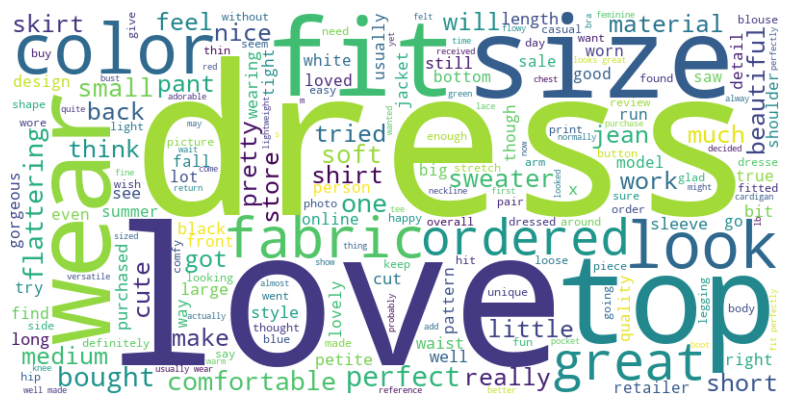

In [8]:
#Exercicio 3

from wordcloud import WordCloud

# Filtrar as linhas onde RecommendedIND é 1 e concatenar todas as revisões em uma string
recommended_texts = ' '.join(df[df['Recommended IND'] == 1]['Review Text'].dropna())

# Criar a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(recommended_texts)

# Plotar a wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

4- Crie um dataframe contendo o número de frases em que uma palavra aparece. As
colunas são:

a. Palavra: a palavra identificada
b. Valor: número de frases com a palavra.

TEXTO NORMALIZADO PARA 3 E 4

In [7]:
#Exercicio 4


# Dicionário para armazenar contagem de frases por palavra
word_count = {}

# Iterar por cada frase e contar quantas vezes cada palavra aparece
for review in df['Review Text']:
    if isinstance(review, str):  # Adicionar essa linha para verificar se 'review' é uma string
        unique_words_in_review = set(review.split())
        for word in unique_words_in_review:
            word_count[word] = word_count.get(word, 0) + 1


# Criar dataframe com os resultados
word_df = pd.DataFrame(list(word_count.items()), columns=['Palavra', 'Valor'])
word_df = word_df.sort_values(by='Valor', ascending=False)  # Ordenar por contagem de frases

print(word_df)


             Palavra  Valor
43               the  19676
2                and  19504
10                 i  18913
19                 a  17741
26              this  16295
...              ...    ...
21571       particle      1
21569  heavy-lifting      1
21568        blades,      1
21566   (disclaimer-      1
37719       platinum      1

[37720 rows x 2 columns]


5- Obtenha as 5 palavras mais frequentes nos textos (utilize o dataframe criado no processo 4).

In [11]:
#Exercicio 5

top_5_words = word_df.head(5)
print(top_5_words)

# Configurar o gráfico
plt.figure(figsize=(10,6))
plt.bar(top_5_words['Palavra'], top_5_words['Valor'], color='skyblue')
plt.title('Top 5 Palavras Mais Frequentes')
plt.xlabel('Palavras')
plt.ylabel('Número de Frases')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()



   Palavra  Valor
43     the  19676
2      and  19504
10       i  18913
19       a  17741
26    this  16295


KeyError: 'Count'

<Figure size 1000x700 with 0 Axes>